# Capstone Project 1

## Data Wrangling

### Importing dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import HeatMap

In [2]:
# Importing Dataframes
healthcares=pd.read_csv('annuaire-des-professionnels-de-sante.csv',delimiter=';')
municipalities=pd.read_csv('code-postal-code-insee-2015.csv',delimiter=';')

In [3]:
print(healthcares.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149477 entries, 0 to 149476
Data columns (total 21 columns):
Civilité                                        149443 non-null object
Code Postal                                     149477 non-null int64
Commune                                         149477 non-null object
Téléphone                                       124193 non-null object
Code profession                                 149477 non-null int64
Mode d'exercice particulier                     3409 non-null object
Nature de l'exercice                            149477 non-null object
Convention du professionnel                     149477 non-null object
Sesam Vitale                                    149477 non-null object
Types d'actes techniques réalisés               109170 non-null object
Codes CCAM des actes techniques réalisés        109179 non-null object
Actes techniques réalisés                       109179 non-null object
Codes CCAM + Phase Actes techniques réali

In [4]:
print(municipalities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39724 entries, 0 to 39723
Data columns (total 25 columns):
Geo Point               39724 non-null object
Geo Shape               39721 non-null object
ID_GEOFLA               39711 non-null object
CODE_COM                39711 non-null float64
INSEE_COM               39711 non-null object
NOM_COM                 39711 non-null object
STATUT                  39711 non-null object
X_CHF_LIEU              39711 non-null float64
Y_CHF_LIEU              39711 non-null float64
X_CENTROID              39711 non-null float64
Y_CENTROID              39711 non-null float64
Z_MOYEN                 39711 non-null float64
SUPERFICIE              39711 non-null float64
POPULATION              39701 non-null float64
CODE_CANT               39566 non-null float64
CODE_ARR                39688 non-null float64
CODE_DEPT               39711 non-null object
NOM_DEPT                39711 non-null object
CODE_REG                39711 non-null object
NOM_REG

In [5]:
healthcares.head()

,Civilité,Code Postal,Commune,Téléphone,Code profession,Mode d'exercice particulier,Nature de l'exercice,Convention du professionnel,Sesam Vitale,Types d'actes techniques réalisés,...,Actes techniques réalisés,Codes CCAM + Phase Actes techniques réalisés,Adresse,Nom du professionnel,Profession,Coordonnées,Code INSEE,EPCI,Département,Région
0,Femme,10300,STE SAVINE,03.25.79.90.92,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,"Pose d'un plan de libération occlusale,Adjonct...","HBLD4520,HBBD0060,HBLD0380,HBFD0060,HBLD4180,H...",63 AVENUE GALLIENI 10300 STE SAVINE,VERONIQUE COMTE,Chirurgien-dentiste,"48.293903, 4.05555",10362,CA Troyes Champagne Métropole,AUBE,GRAND EST
1,Femme,42660,ST GENEST MALIFAUX,04.77.51.70.68,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,"Pose d'un plan de libération occlusale,Exérèse...","HBLD0750,HBBD0060,HBMD0170,HBMD0200,HBLD0380,H...",18 RUE DU VELAY 42660 ST GENEST MALIFAUX,FRANCOISE CONDAMIN,Chirurgien-dentiste,"45.339643, 4.418339",42224,CC des Monts du Pilat,LOIRE,AUVERGNE-RHONE-ALPES
2,Femme,59830,CYSOING,03.20.79.54.07,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,Restauration d'une dent d’un secteur incisivoc...,"HBLD1230,HBMD0200,HBLD0380,HBMD0530,HBMD0540,H...",83 RUE ROGER SALENGRO 59830 CYSOING,DENISE COPIN,Chirurgien-dentiste,"50.567909, 3.216851",59168,CC Pévèle-Carembault,NORD,HAUTS-DE-FRANCE
3,Femme,62190,LILLERS,07.71.83.09.91,18,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...",...,Restauration d'une dent d’un secteur incisivoc...,"HBMD0530,HBFD0030,HBGD0350,HBMD0500,HBMD0440,H...",CABINET DU DR COMPAGNON ZAC DE LA HAYE 120 RUE...,JULIE COMPAGNON,Chirurgien-dentiste,"50.56338, 2.466451",62516,"CA de Béthune-Bruay, Artois-Lys Romane",PAS-DE-CALAIS,HAUTS-DE-FRANCE
4,Femme,21450,VILLAINES EN DUESMOIS,03.80.89.04.44,45,NaN,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,Actes techniques médicaux (hors imagerie),...,Injection thérapeutique d'agent pharmacologiqu...,"JKHD0010,MZLB0010",3 ROUTE DE MONTBARD 21450 VILLAINES EN DUESMOIS,ELENA CORBEANU,Médecin généraliste,"47.679272, 4.524453",21685,CC du Pays Châtillonnais,COTE-D'OR,BOURGOGNE-FRANCHE-COMTE


In [6]:
municipalities.head()

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,CODE_ARR,CODE_DEPT,NOM_DEPT,CODE_REG,NOM_REG,Ligne_5,Libelle_acheminement,Code_postal,Nom_commune,coordonnees_gps
0,"43.2213812599, -0.229479954692","{""type"": ""Polygon"", ""coordinates"": [[[-0.21425...",COMMUNE00000000000012233,119.0,64119,BEUSTE,Commune simple,437369.0,6240814.0,437816.0,...,3.0,64,PYRENEES-ATLANTIQUES,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,BEUSTE,64800,BEUSTE,"43.2213812599, -0.229479954692"
1,"45.3088178571, 0.812461373925","{""type"": ""Polygon"", ""coordinates"": [[[0.827398...",COMMUNE00000000000010957,239.0,24239,LIGUEUX,Commune simple,529105.0,6470098.0,528740.0,...,3.0,24,DORDOGNE,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,NaN,NaN,NaN,NaN,"45.3088178571, 0.812461373925"
2,"44.9958115913, 2.16384260373","{""type"": ""Polygon"", ""coordinates"": [[[2.169220...",COMMUNE00000000000010998,135.0,15135,MONTVERT,Commune simple,633833.0,6433252.0,634558.0,...,1.0,15,CANTAL,84,AUVERGNE-RHONE-ALPES,NaN,MONTVERT,15150,MONTVERT,"44.9958115913, 2.16384260373"
3,"42.995424347, 2.16142100485","{""type"": ""Polygon"", ""coordinates"": [[[2.150276...",COMMUNE00000000000011061,45.0,11045,BOURIEGE,Commune simple,631944.0,6209982.0,631924.0,...,2.0,11,AUDE,76,LANGUEDOC-ROUSSILLON-MIDI-PYRENEES,NaN,BOURIEGE,11300,BOURIEGE,"42.995424347, 2.16142100485"
4,"48.6279115585, 6.49593570879","{""type"": ""Polygon"", ""coordinates"": [[[6.475699...",COMMUNE00000000000011047,83.0,54083,BONVILLER,Commune simple,957623.0,6842744.0,957546.0,...,2.0,54,MEURTHE-ET-MOSELLE,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,NaN,BONVILLER,54300,BONVILLER,"48.6279115585, 6.49593570879"


### Data Cleaning

In [7]:
# Removing the column in the healthcares dataframe with too many NaN Values 
healthcares=healthcares.dropna(thresh=100000,axis='columns')
# Removing the column in the healthcares dataframe with too many NaN Values 
municipalities=municipalities.dropna(thresh=5000,axis='columns')

In [8]:
# Filtering both dataframes by removing the NaN Values from the 'Code Postal' & 'Code_postal' columns
Healthcares=healthcares[healthcares['Code Postal'].notnull()]
Municipalities=municipalities[municipalities['Code_postal'].notnull()]

In [9]:
# Removing the overseas department 
Municipalities=Municipalities[(Municipalities['NOM_REG']!='REUNION')&(Municipalities['NOM_REG']!='MARTINIQUE')&
                             (Municipalities['NOM_REG']!='MAYOTTE')&(Municipalities['NOM_REG']!='GUADELOUPE')&
                             (Municipalities['NOM_REG']!='GUYANE')]
Healthcares=Healthcares[(Healthcares['Région']!='LA REUNION')&(Healthcares['Région']!='MARTINIQUE')&
                       (Healthcares['Région']!='MAYOTTE')&(Healthcares['Région']!='GUADELOUPE')&
                       (Healthcares['Région']!='GUYANE')]

In [10]:
# dtype values of the 'Code_postal' column
Zip_code=Municipalities['Code_postal']
Zip_code.dtype

dtype('O')

In [11]:
# Find the str values in the 'Code_postal' column 
sorted(Zip_code,reverse=True)[:15]

['ST LAURENT DU MARONI',
 'ST ELIE',
 'ROURA',
 'ROURA',
 'REGINA',
 'REGINA',
 'MARIPASOULA',
 'MANA',
 'MANA',
 'CAMOPI',
 '9800',
 '9800',
 '9800',
 '9800',
 '9800']

In [12]:
# Removing the str values in the 'Code_postal' column and converting them in integer values
Municipalities=Municipalities[(Municipalities['Code_postal']!='ST LAURENT DU MARONI')&
                              (Municipalities['Code_postal']!='ST ELIE')&(Municipalities['Code_postal']!='ROURA')&
                              (Municipalities['Code_postal']!='REGINA')&(Municipalities['Code_postal']!='MARIPASOULA')&
                              (Municipalities['Code_postal']!='MANA')&(Municipalities['Code_postal']!='CAMOPI')]
Municipalities['Code_postal']=Municipalities['Code_postal'].astype(int)

In [13]:
# Changing some incorrect name in Municipalities 
Municipalities.NOM_REG[Municipalities.NOM_REG=='LANGUEDOC-ROUSSILLON-MIDI-PYRENEES']='OCCITANIE'
Municipalities.NOM_REG[Municipalities.NOM_REG=='AQUITAINE-LIMOUSIN-POITOU-CHARENTES']='NOUVELLE-AQUITAINE'
Municipalities.NOM_REG[Municipalities.NOM_REG=='ALSACE-CHAMPAGNE-ARDENNE-LORRAINE']='GRAND EST'
Municipalities.NOM_REG[Municipalities.NOM_REG=='NORD-PAS-DE-CALAIS-PICARDIE']='HAUTS-DE-FRANCE'

C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Diane\Anaconda3\lib\

### Creating new columns in Municipalities

#### North / South 

In [14]:
# Creating a new column cutting France in two parts : North and South 
Municipalities['North_South']=''
Municipalities.North_South[(Municipalities.NOM_REG=='AUVERGNE-RHONE-ALPES')|
                           (Municipalities.NOM_REG=='CORSE')|
                          (Municipalities.NOM_REG=='OCCITANIE')|
                          (Municipalities.NOM_REG=='NOUVELLE-AQUITAINE')|
                          (Municipalities.NOM_REG=="PROVENCE-ALPES-COTE D'AZUR")]='South'
Municipalities.North_South[(Municipalities.NOM_REG!='AUVERGNE-RHONE-ALPES')&
                           (Municipalities.NOM_REG!='CORSE')&
                          (Municipalities.NOM_REG!='OCCITANIE')&
                          (Municipalities.NOM_REG!='NOUVELLE-AQUITAINE')&
                          (Municipalities.NOM_REG!="PROVENCE-ALPES-COTE D'AZUR")]='North'

C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


#### Population and surface area by zipcode

In [15]:
# Groupby population and zip code
Groupby_zipcode=Municipalities.groupby('Code_postal')[['POPULATION','SUPERFICIE']].sum()
Groupby_zipcode.columns=['Population_Zipcode','SurfaceArea_Zipcode']

In [16]:
# Merging 'Population_Zipcode' with Municipalities
Municipalities=pd.merge(Municipalities,Groupby_zipcode,left_on=['Code_postal'],right_on=['Code_postal'],how='left')

#### Longitude & Latitude

In [17]:
# Separating Latitude & Longitude 
Lat=[]
Lon=[]
Geo=np.array(Municipalities['Geo Point'])
for i in Geo:
    for index,j in enumerate (i):
        if j== ',':
            a=i[:index]
            b=i[index+1:]
    Lat.append(float(a))
    Lon.append(float(b))
Municipalities['Latitude']=Lat
Municipalities['Longitude']=Lon

### Merging both dataframes with Zip Code and Insee Code columns 

In [18]:
# Merging both dataframes through ['Code Postal'] & ['Code_postal'] column
data_merge=pd.merge(Healthcares,Municipalities,left_on=['Code Postal'],right_on=['Code_postal'],how='left')

In [19]:
# Deleting duplicate rows and rows with null data in the right part of the dataframe
data_merge=data_merge[data_merge.INSEE_COM.notnull()]
data_merge=data_merge.drop_duplicates(['Nom du professionnel'])

In [20]:
data_merge.head(10)

,Civilité,Code Postal,Commune,Téléphone,Code profession,Nature de l'exercice,Convention du professionnel,Sesam Vitale,Types d'actes techniques réalisés,Codes CCAM des actes techniques réalisés,...,NOM_REG,Libelle_acheminement,Code_postal,Nom_commune,coordonnees_gps,North_South,Population_Zipcode,SurfaceArea_Zipcode,Latitude,Longitude
0,Femme,10300,STE SAVINE,03.25.79.90.92,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBLD418,HBLD452,HBMD047,HBLD131,HBQK191,HBFD02...",...,GRAND EST,MACEY,10300.0,MACEY,"48.3058173125, 3.91397104907",North,12340.0,6039.0,48.305817,3.913971
4,Femme,42660,ST GENEST MALIFAUX,04.77.51.70.68,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBLD418,HBFD024,HBGD043,HBMD054,HBMD049,HBGD03...",...,AUVERGNE-RHONE-ALPES,TARENTAISE,42660.0,TARENTAISE,"45.3614411312, 4.49208822359",South,8681.0,16034.0,45.361441,4.492088
12,Femme,59830,CYSOING,03.20.79.54.07,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBMD058,HBMD047,HBFD024,HBGD043,HBMD054,HBMD04...",...,HAUTS-DE-FRANCE,BOURGHELLES,59830.0,BOURGHELLES,"50.5638806886, 3.24666389869",North,11203.0,3847.0,50.563881,3.246664
19,Femme,62190,LILLERS,07.71.83.09.91,18,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de Prophylaxie et Prévention,Actes d'ima...","HBMD047,HBQK191,HBGD043,HBBD005,HBMD049,HBGD03...",...,HAUTS-DE-FRANCE,AUCHY AU BOIS,62190.0,AUCHY AU BOIS,"50.5508313076, 2.37420575529",North,14000.0,5106.0,50.550831,2.374206
27,Femme,21450,VILLAINES EN DUESMOIS,03.80.89.04.44,45,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,Actes techniques médicaux (hors imagerie),"MZLB001,JKHD001",...,BOURGOGNE-FRANCHE-COMTE,JOURS LES BAIGNEUX,21450.0,JOURS LES BAIGNEUX,"47.6251748085, 4.60397343724",North,1578.0,22315.0,47.625175,4.603973
42,Femme,33240,ST ANDRE DE CUBZAC,05.57.43.61.49,71,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de chirurgie,Actes techniques médicaux (...","JKHD001,QZGA002,JKKD001",...,NOUVELLE-AQUITAINE,VIRSAC,33240.0,VIRSAC,"45.02587074, -0.435563206716",South,32718.0,16053.0,45.025871,-0.435563
63,Femme,39110,SALINS LES BAINS,03.84.73.28.23,45,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,Actes techniques médicaux (hors imagerie),"DEQP003,JKHD001",...,BOURGOGNE-FRANCHE-COMTE,CHILLY SUR SALINS,39110.0,CHILLY SUR SALINS,"46.870060882, 5.85823699869",North,7001.0,22933.0,46.870061,5.858237
89,Femme,35200,RENNES,NaN,71,Libéral activité salariée,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,"Actes de chirurgie,Actes techniques médicaux (...","QZLA004,JKHD001,QZGA002,JKLD001",...,BRETAGNE,RENNES,35200.0,RENNES,"48.111571436, -1.68168588816",North,209860.0,5036.0,48.111571,-1.681686
90,Femme,9600,LAROQUE D OLMES,05.61.64.04.58,23,Libéral intégral,"Secteur 2, Signature du contrat d'accès aux soins",Lecteur de carte Sesam Vitale,NaN,NaN,...,OCCITANIE,ESCLAGNE,9600.0,ESCLAGNE,"42.9812118767, 1.84379320411",South,8166.0,26124.0,42.981212,1.843793
106,Femme,95350,ST BRICE SOUS FORET,01.39.94.42.32,45,Libéral intégral,Secteur 1 ou conventionné,Lecteur de carte Sesam Vitale,NaN,NaN,...,ILE-DE-FRANCE,PISCOP,95350.0,PISCOP,"49.0165466205, 2.34156318316",North,15069.0,1012.0,49.016547,2.341563


In [21]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 643127
Data columns (total 49 columns):
Civilité                                        123686 non-null object
Code Postal                                     123710 non-null int64
Commune                                         123710 non-null object
Téléphone                                       106379 non-null object
Code profession                                 123710 non-null int64
Nature de l'exercice                            123710 non-null object
Convention du professionnel                     123710 non-null object
Sesam Vitale                                    123710 non-null object
Types d'actes techniques réalisés               87382 non-null object
Codes CCAM des actes techniques réalisés        87388 non-null object
Actes techniques réalisés                       87388 non-null object
Codes CCAM + Phase Actes techniques réalisés    87388 non-null object
Adresse                                    

## Data Storytelling

### Creating new datasets

In [22]:
# Population and Doctors by Region
# Groupby the number of doctors by region
Doctors_number_by_region=Healthcares.groupby('Région')[['Code profession']].count()
Doctors_number_by_region.columns=['Doctors_number']
# Groupby the population by region
Population_by_region=Municipalities.groupby('NOM_REG')[['POPULATION']].count()
Population_by_region.columns=['Population']
# Merge both datasets
Population_Doctors_by_region=Doctors_number_by_region.join(Population_by_region)
Population_Doctors_by_region=Population_Doctors_by_region.sort_values('Doctors_number')
# New column North / South
Population_Doctors_by_region['North_South']=''
Population_Doctors_by_region.North_South[(Population_Doctors_by_region.index=='AUVERGNE-RHONE-ALPES')|
                           (Population_Doctors_by_region.index=='CORSE')|
                          (Population_Doctors_by_region.index=='OCCITANIE')|
                          (Population_Doctors_by_region.index=='NOUVELLE-AQUITAINE')|
                          (Population_Doctors_by_region.index=="PROVENCE-ALPES-COTE D'AZUR")]='South'
Population_Doctors_by_region.North_South[(Population_Doctors_by_region.index!='AUVERGNE-RHONE-ALPES')&
                           (Population_Doctors_by_region.index!='CORSE')&
                          (Population_Doctors_by_region.index!='OCCITANIE')&
                          (Population_Doctors_by_region.index!='NOUVELLE-AQUITAINE')&
                          (Population_Doctors_by_region.index!="PROVENCE-ALPES-COTE D'AZUR")]='North'
Population_Doctors_by_region.head()

C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Diane\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Doctors_number,Population,North_South
Région,,,
CORSE,768,418,South
CENTRE-VAL DE LOIRE,4244,1892,North
BOURGOGNE-FRANCHE-COMTE,4887,4031,North
NORMANDIE,5360,3376,North
BRETAGNE,6032,1362,North


In [23]:
# Type of Doctors by Zip Code
# Groupby type of healthcares professional by region
Doctors_type_region=Healthcares.groupby(['Région','Profession'])[['Code profession']].count()
Doctors_type_region=Doctors_type_region.unstack('Profession')
print(Doctors_type_region.describe().iloc[1,:].sort_values(ascending=False).head())

# Merge with Population_Doctors_by_region to keep the same index order
Population_Doctors_by_region_2=Doctors_number_by_region.join(Doctors_type_region)
Population_Doctors_by_region_2=Population_Doctors_by_region_2.sort_values('Doctors_number')
Population_Doctors_by_region_2.head()

                 Profession         
Code profession  Médecin généraliste    3767.923077
                 Chirurgien-dentiste    2116.384615
                 Radiologue              757.615385
                 Psychiatre              393.538462
                 Ophtalmologiste         329.769231
Name: mean, dtype: float64


C:\Users\Diane\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Doctors_number,"(Code profession, Anesthésiste réanimateur)","(Code profession, Cancérologue radiothérapeute)","(Code profession, Cancérologue médical)","(Code profession, Cardiologue)","(Code profession, Chirurgien général)","(Code profession, Chirurgien infantile)","(Code profession, Chirurgien maxillo-facial)","(Code profession, Chirurgien maxillo-facial et stomatologiste)","(Code profession, Chirurgien orthopédiste et traumatologue)",...,"(Code profession, Psychiatre de l'enfant et de l'adolescent)","(Code profession, Pédiatre)","(Code profession, Radiologue)","(Code profession, Radiothérapeute)","(Code profession, Rhumatologue)","(Code profession, Réanimateur médical)","(Code profession, Sage-femme)","(Code profession, Spécialiste en médecine interne)","(Code profession, Spécialiste en médecine physique et de réadaptation)","(Code profession, Stomatologiste)"
Région,,,,,,,,,,,,,,,,,,,,,
CORSE,768,17.0,NaN,2.0,25.0,3.0,NaN,NaN,3.0,10.0,...,NaN,13.0,66.0,NaN,6.0,NaN,9.0,1.0,4.0,1.0
CENTRE-VAL DE LOIRE,4244,102.0,3.0,6.0,135.0,31.0,NaN,NaN,7.0,71.0,...,4.0,64.0,262.0,NaN,44.0,NaN,123.0,6.0,5.0,16.0
BOURGOGNE-FRANCHE-COMTE,4887,101.0,3.0,8.0,124.0,18.0,3.0,2.0,3.0,86.0,...,1.0,67.0,411.0,NaN,33.0,NaN,124.0,2.0,9.0,15.0
NORMANDIE,5360,94.0,6.0,5.0,149.0,35.0,7.0,2.0,17.0,88.0,...,4.0,66.0,596.0,NaN,52.0,NaN,129.0,4.0,6.0,22.0
BRETAGNE,6032,97.0,4.0,8.0,134.0,20.0,1.0,1.0,4.0,68.0,...,8.0,75.0,375.0,1.0,62.0,NaN,198.0,1.0,9.0,4.0


In [24]:
# Population and Doctors by Zip Code
# Dataframe doctors number by zip code
Population_Doctors_by_zipcode=data_merge.groupby(['Code Postal','Latitude','Longitude','Population_Zipcode'])[['Code profession']].count()
Population_Doctors_by_zipcode.columns=['Doctors_number']
Population_Doctors_by_zipcode=Population_Doctors_by_zipcode.reset_index()
Population_Doctors_by_zipcode=Population_Doctors_by_zipcode.set_index('Code Postal')
Population_Doctors_by_zipcode['Ratio_Doctors_Population']=Population_Doctors_by_zipcode.Doctors_number/Population_Doctors_by_zipcode.Population_Zipcode
Population_Doctors_by_zipcode.head()

,Latitude,Longitude,Population_Zipcode,Doctors_number,Ratio_Doctors_Population
Code Postal,,,,,
1000,46.211401,5.184308,85846.0,168,0.001957
1090,46.073448,4.812098,11799.0,5,0.000424
1100,46.238440,5.635638,78444.0,43,0.000548
1110,46.019540,5.599769,7082.0,10,0.001412
1120,45.822087,5.059683,32233.0,17,0.000527


### Doctors number and Population by Region

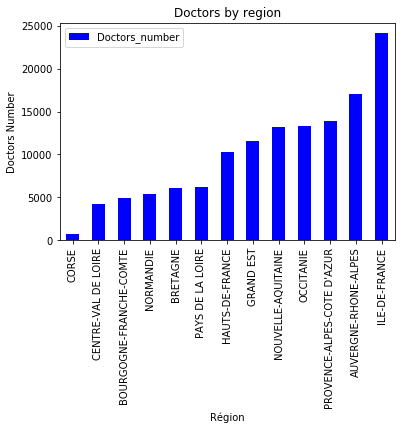

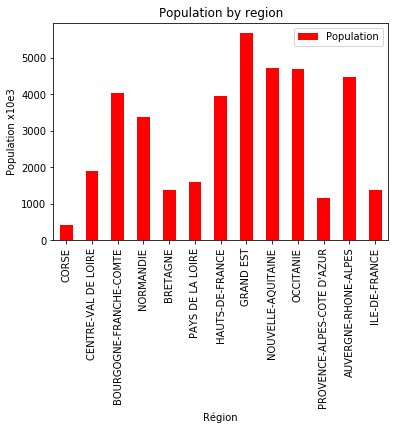

In [25]:
Population_Doctors_by_region.plot(y='Doctors_number',kind='bar',color='b')
plt.title('Doctors by region')
plt.ylabel('Doctors Number')
plt.show()
Population_Doctors_by_region.plot(y='Population',kind='bar',color='r')
plt.title('Population by region')
plt.ylabel('Population x10e3')
plt.show()

### Doctors number and Population by North and South of the France

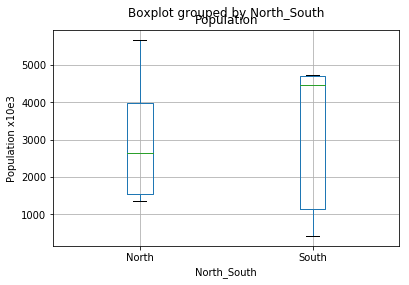

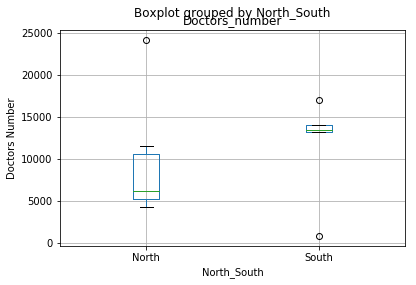

In [26]:
Population_Doctors_by_region.boxplot(by='North_South',column='Population')
plt.ylabel('Population x10e3')
plt.show()
Population_Doctors_by_region.boxplot(by='North_South',column='Doctors_number')
plt.ylabel('Doctors Number')
plt.show()

### Healthcares professional type by region

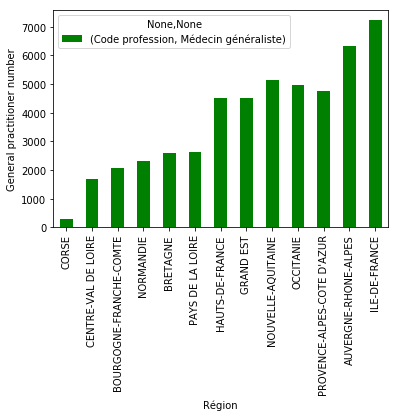

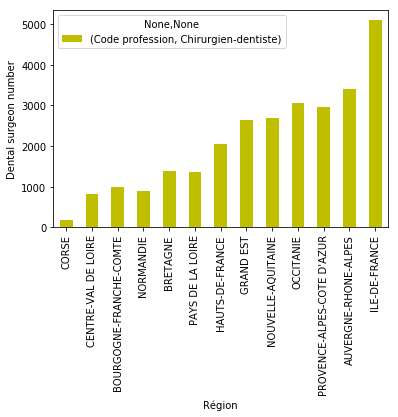

In [27]:
Population_Doctors_by_region_2.plot(y=('Code profession', 'Médecin généraliste'),kind='bar',color='g')
plt.ylabel('General practitioner number')
plt.show()
Population_Doctors_by_region_2.plot(y=('Code profession', 'Chirurgien-dentiste'),kind='bar',color='y')
plt.ylabel('Dental surgeon number')
plt.show()

### Doctors number Heatmap

In [28]:
# France Map
France_map=folium.Map(location=[46.63728, 2.3382623],zoom_start = 6)

Lat_Lon_Val = Population_Doctors_by_zipcode[['Latitude', 'Longitude','Doctors_number']]
Lat_Lon_Val = Lat_Lon_Val.dropna(axis=0, subset=['Latitude','Longitude','Doctors_number'])

# List comprehension to make out list of lists
Data = [[row['Latitude'],row['Longitude'],row['Doctors_number']] for index, row in Lat_Lon_Val.iterrows()]

Max_amount = float(Population_Doctors_by_zipcode['Doctors_number'].max())

# Plot it on the map
HeatMap(Data,radius=17, max_val=Max_amount, max_zoom=1).add_to(France_map)

# Markers Cities
folium.Marker([45.764043, 4.835659], popup='Lyon').add_to(France_map)
folium.Marker([48.8534, 2.3488], popup='Paris').add_to(France_map)
folium.Marker([43.296482, 5.36978], popup='Marseille').add_to(France_map)
folium.Marker([43.604652, 1.444209], popup='Toulouse').add_to(France_map)
folium.Marker([44.837789, -0.57918], popup='Bordeaux').add_to(France_map)
folium.Marker([47.218371, -1.553621], popup='Nantes').add_to(France_map)
folium.Marker([48.5734053, 7.7521113], popup='Strasbourg').add_to(France_map)
folium.Marker([43.7101728, 7.2619532], popup='Nice').add_to(France_map)
folium.Marker([43.610769, 3.876716], popup='Montpellier').add_to(France_map)
folium.Marker([50.633333, 3.066667], popup='Lille').add_to(France_map)
    
# Display the map
France_map.save('Doctors.html')

### Population Heatmap

In [29]:
France_Map=folium.Map(location=[46.63728, 2.3382623],zoom_start = 6)

Lat_Lon = data_merge[['Latitude', 'Longitude','POPULATION']]
Lat_Lon = Lat_Lon.dropna(axis=0, subset=['Latitude','Longitude','POPULATION'])

# List comprehension to make out list of lists
data = [[row['Latitude'],row['Longitude'],row['POPULATION']] for index, row in Lat_Lon.iterrows()]

max_amount = float(data_merge['POPULATION'].max())

# Plot it on the map
HeatMap(data,radius=14, max_val=max_amount, max_zoom=1).add_to(France_Map)

# Markers Cities
folium.Marker([45.764043, 4.835659], popup='Lyon').add_to(France_Map)
folium.Marker([48.8534, 2.3488], popup='Paris').add_to(France_Map)
folium.Marker([43.296482, 5.36978], popup='Marseille').add_to(France_Map)
folium.Marker([43.604652, 1.444209], popup='Toulouse').add_to(France_Map)
folium.Marker([44.837789, -0.57918], popup='Bordeaux').add_to(France_Map)
folium.Marker([47.218371, -1.553621], popup='Nantes').add_to(France_Map)
folium.Marker([48.5734053, 7.7521113], popup='Strasbourg').add_to(France_Map)
folium.Marker([43.7101728, 7.2619532], popup='Nice').add_to(France_Map)
folium.Marker([43.610769, 3.876716], popup='Montpellier').add_to(France_Map)
folium.Marker([50.633333, 3.066667], popup='Lille').add_to(France_Map)

# Display the map
France_Map.save('Population.html')

### Ratio Doctors / Population Heatmap

In [30]:
france_map=folium.Map(location=[46.63728, 2.3382623],zoom_start = 6)

lat_lon = Population_Doctors_by_zipcode[['Latitude', 'Longitude','Ratio_Doctors_Population']]
lat_lon = lat_lon.dropna(axis=0, subset=['Latitude','Longitude','Ratio_Doctors_Population'])

# List comprehension to make out list of lists
data_ = [[row['Latitude'],row['Longitude'],row['Ratio_Doctors_Population']] for index, row in lat_lon.iterrows()]

maxamount = float(Population_Doctors_by_zipcode['Ratio_Doctors_Population'].max())

# Plot it on the map
HeatMap(data,radius=10, max_val=maxamount, max_zoom=1).add_to(france_map)

# Markers Cities
folium.Marker([45.764043, 4.835659], popup='Lyon').add_to(france_map)
folium.Marker([48.8534, 2.3488], popup='Paris').add_to(france_map)
folium.Marker([43.296482, 5.36978], popup='Marseille').add_to(france_map)
folium.Marker([43.604652, 1.444209], popup='Toulouse').add_to(france_map)
folium.Marker([44.837789, -0.57918], popup='Bordeaux').add_to(france_map)
folium.Marker([47.218371, -1.553621], popup='Nantes').add_to(france_map)
folium.Marker([48.5734053, 7.7521113], popup='Strasbourg').add_to(france_map)
folium.Marker([43.7101728, 7.2619532], popup='Nice').add_to(france_map)
folium.Marker([43.610769, 3.876716], popup='Montpellier').add_to(france_map)
folium.Marker([50.633333, 3.066667], popup='Lille').add_to(france_map)

# Display the map
france_map.save('Ratio.html')

### Scatter plot Population / Doctors number

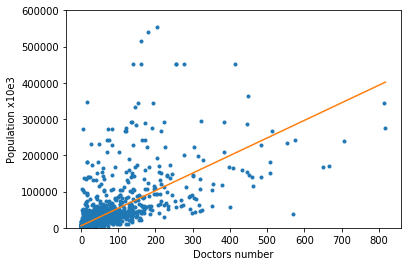

In [31]:
X=Population_Doctors_by_zipcode.Doctors_number
Y=Population_Doctors_by_zipcode.Population_Zipcode

# Linear Regression Line
slope,intercept=np.polyfit(X,Y,1)
x=np.array([0,max(X)])
y=slope*x+intercept

# Plot
_=plt.plot(X,Y,marker='.',linestyle='none')
_=plt.plot(x,y)
_=plt.ylim(0,600000)
_=plt.xlabel('Doctors number')
_=plt.ylabel('Population x10e3')
plt.show()